In [14]:
import random
import os

In [15]:
c = range(1,10)
N = 9
index1 = random.sample(c, N)

 
print(index1)


[1, 3, 8, 5, 2, 9, 6, 4, 7]


In [16]:
"""
point[index, (x,y)]
layout[index, place]
"""
# gapx, gapy = 100, 50
gapx, gapy = 20, 8
W1, W2 = 3, 1
minX, maxX = -20, 500
minY, maxY = -20, 500
point=[]
layout=[]
# filename = "./readytorun.txt"
sourcefolder = "./DenseMap/DenseMapReadyToRun/"
savefolder = "./resultTabu2.0/"

In [17]:
def prepare_data(selectlist, filename):
    point.clear()
    layout.clear()
    num = 1
    for line in open(filename):
        index, x, y = line.strip().split(" ")
        if int(index) in selectlist:
            point.extend([(num,(float(x),float(y)))])
            num = num + 1
    for i in range(len(point)):
        layout.append([i+1, random.randint(1,4), 0])


In [18]:
"""
Get the tagrec bottom-left
"""
def getPos(i,m):
    pointx = point[i][1][0]
    pointy = point[i][1][1]
    # print(pointx, pointy)
    if m==1:
        return [(pointx,pointy),(pointx+gapx,pointy),(pointx+gapx,pointy+gapy),(pointx,pointy+gapy)]
    elif m==2:
        return [(pointx-gapx,pointy),(pointx,pointy),(pointx,pointy+gapy),(pointx-gapx,pointy+gapy)]
    elif m==3:
        return [(pointx-gapx,pointy-gapy),(pointx,pointy-gapy),(pointx,pointy),(pointx-gapx,pointy)]
    else:
        return [(pointx, pointy-gapy),(pointx+gapx,pointy-gapy),(pointx+gapx,pointy),(pointx,pointy)]

"""
to test is it inside of a rec
"""
def inner(point, rec):
    if point[0] > rec[0][0] and point[1] > rec[0][1] and point[0] < rec[1][0] and point[1] > rec[1][1] and point[0] < rec[2][0] and point[1] < rec[2][1] and point[0] > rec[3][0] and point[1] < rec[3][1]:
        return True
    return False

"""
判断冲突
vect:layout list
"""
def conflict(vect,i,j):
    m = vect[i][1]
    n = vect[j][1]
    reci = getPos(i,m)
    recj = getPos(j,n)
    for i in range(len(reci)):
        if inner(reci[i], recj):
            return True
    return False

"""
count each point its confilict count
"""
def costconfilct(vect):
    sum = 0
    for i in range(len(point)):
        temp = 0
        for j in range(len(point)):
            if i != j:
                if(conflict(vect,i,j)):
                    temp = temp + 1
        vect[i][2] = temp
        sum = sum + temp
    # print("conflict:"+str(sum))
    return sum

# print(costroad(layout))

In [19]:
"""
each point its layout cost
"""
def cost_function(layout):
    res = 0
    for i in range(len(point)):
        res = res + layout[i][1]*0.1
    # print(res)
    return res
print(cost_function(layout))

"""
计算每个点total cost
"""
def costroad(vect):
    conflict = costconfilct(vect)
    conflict = W1*conflict + W2*cost_function(vect)
    return conflict
costroad(layout)

0


0

In [20]:
"""
lower compute complexity version of total cost
used in tabu search update
"""
def costrod_lite(new_set, old_set, pointx):
    conflict_sum = 0
    for i in range(len(point)):
        a = conflict(new_set, i, pointx-1)
        b = conflict(old_set, i, pointx-1)
        # print(i,pointx,a,b)
        if a is True and b is False:
            # conflict_sum = conflict_sum + 1
            new_set[i][2] = new_set[i][2]+1
        elif a is False and b is True:
            # conflict_sum = conflict_sum - 1
            new_set[i][2] = new_set[i][2]-1
    # print(new_set[pointx-1][1], old_set[pointx-1][1])
    for i in range(len(point)):
        conflict_sum = conflict_sum + new_set[i][2]
    # print("lite")
    # print(conflict_sum)
    conflict_sum = 3*conflict_sum + cost_function(new_set) - new_set[pointx-1][1]*0.1 + old_set[pointx-1][1]*0.1
    return conflict_sum

In [21]:
"""
to plot
"""
import matplotlib.pyplot as plt
def plot(layout,name):
        def create_rect(i, width, height):
                pointx = point[i][1][0]
                pointy = point[i][1][1]
                m = layout[i][1]
                if m==1:
                        x,y = pointx,pointy
                elif m==2:
                        x, y = pointx-width,pointy
                elif m==3:
                        x, y = pointx-width,pointy-height
                else:
                        x, y = pointx, pointy-height
                rect=plt.Rectangle(
                        (x, y),  # (x,y)矩形左下角
                        width,  # width长
                        height,  # height宽
                        # color='maroon', 
                        fill = False)
                return rect
        fig1 = plt.figure(figsize=(16,9))
        plt.axis('off')
        ax1 = fig1.add_subplot(111)

        for i in range(len(point)):
                ax1.add_patch(create_rect(i, gapx, gapy))
        # plt.xlim(2400,5200)
        # plt.ylim(7100,12812)
        # plt.xlim(-20,500)
        # plt.ylim(-20,500)
        plt.xlim(minX,maxX)
        plt.ylim(minY,maxY)
        plt.title("{}".format(name))
        # plt.savefig("./result/resultImg-{}.svg".format(name), format="svg")
        plt.show()
# plot()
# plt.savefig('scatter.eps',dpi=600,format='eps')

def save(layout, cost_result, path):
        #gapx, gapy = 20, 8
# W1, W2 = 3, 1
# minX, maxX = -20, 500
# minY, maxY = -20, 500
        f = open(path, "w")
        f.write("cost_init,cost_final,confilct_init,conflict_final\n")
        for i in range(len(cost_result)):
                if i == len(cost_result)-1:
                        f.write("{}\n".format(cost_result[i]))
                else:
                        f.write("{} ".format(cost_result[i]))
        f.write("gapx, gapy = {},{}\n".format(gapx, gapy))
        f.write("minX, maxX = {},{}\n".format(minX, maxX))
        f.write("minY, maxY = {},{}\n".format(minY, maxY))
        for i in range(len(layout)):
                towrite = str(point[i][1][0]) + " " + str(point[i][1][1]) + " " + str(layout[i][1]) + "\n"
                f.write(towrite)
        f.close()

In [22]:
import copy
def tabusearch(iteration_times,cacu_time,tabu_length,origin_times,costf,printf,costflite,namefortest):
    """
    iteration_times为每一个初始解的迭代次数，cacu_time为候选集合长度，tabu_length为禁忌长度，
    origin_times为整个程序循环次数，可以理解为使用不同个初始解，costf为成本函数，printtravel为打印结果函数
    """
    def pan_move(move_step,tabu_move):  #判断移动是否在禁忌区域中，如果是返回True和该点索引，否则返回False和0
        if move_step in tabu_move:
            index = tabu_move.index(move_step)
            return(True,index)
        else:
            return(False,0)
    def pan_cost(cost,tabu_cost,t):  #判断该移动是否比禁忌区域中该移动小，如果小则返回True，否则返回False
        if cost<tabu_cost[t]:
            return(True)
        else:
            return(False)  
    def add_tabu(cost,move,tabu_cost,tabu_move,t):  #为禁忌区域添加移动和成本，若超过T则剔除最先进入的禁忌
        tabu_cost.append(cost)
        tabu_move.append(move)
        if len(tabu_cost)>t:
            del tabu_cost[0]
        if len(tabu_move)>t:
            del tabu_move[0]
        return(tabu_cost,tabu_move)
    def cacu(vec,t):    #为每一个初始解计算t次
        vec_set = []
        m_set = []
        cost_set = []
        h = []
        for i in range(t):
            v,m,c,h = move(vec,h)
            vec_set.append(v)
            m_set.append(m)
            cost_set.append(c)
        return(vec_set,m_set,cost_set)
    def cacu_tiqu(v1,m1,c1):    #从上述t次筛选最小的解向量，移动和成本
        t = c1.index(min(c1))
        v_max = v1[t]
        m_max = m1[t]
        c_max = c1[t]
        return(v_max,m_max,c_max)
    def move(vec,h):  #输出移动后的向量，和成本
        i = 1
        while i==1:
            sel = random.sample(vec,1)
            # print(sel)
            # m.sort()
            while True:
                nextPos = random.randint(1,4)
                if nextPos != sel[0][1]:
                    break
            m = [sel[0][0],sel[0][1],nextPos]
            if m not in h:
                h.append(m)
                vec_copy = copy.deepcopy(vec)
                vec_copy[sel[0][0]-1][1] = m[2]
                # vec_copy[vec_copy.index(m)][2] = cal
                # vec_copy[vec_copy.index(m[1])] = m[0]
                # print("vec是：")
                # print((vec_copy))
                cost = costflite(vec_copy, vec, m[0])
                # print("损失是："+str(cost))
                i = 0
                return(vec_copy,m,cost,h)
    finall_road = []
    finall_cost = []
    layout = []
    for t1 in range(origin_times):
        # road = [i for i in range(1,29)]
        # random.shuffle(road)
        layout.clear()
        for i in range(len(point)):
            layout.append([i+1, random.randint(1,4), 0])
        print("初始状态：")
        cost_init = costf(layout)
        confilct_init = costconfilct(layout)
        print(cost_init)
        nameprefix = str(namefortest) + "_" + str(cost_init)
        plot(layout=layout,name=nameprefix)
        # plot_withname(a=layout,name=nameprefix)
        # print(costf(layout))
        # plot(layout)
        # fig1 = plt.figure()
        # ax1 = fig1.add_subplot(111)
        # for i in range(len(point)):
        #     ax1.add_patch(create_rect(i, gapx, gapy))
        # plt.xlim(2600,5000)
        # plt.ylim(7100,12312)
        # plt.show()

        tabu_cost = []
        tabu_move = []
        tabu_length = 7 + int(costconfilct(layout)*0.25)
        cacu_time = 1 + int(costconfilct(layout)*0.05)
        # print("计算次数："+str(cacu_time))
        # print("tabu长度："+str(tabu_length))
        for t in range(iteration_times):
            if t % 50 == 0:
                cacu_time = 1 + int(costconfilct(layout)*0.05)
                tabu_length = 7 + int(costconfilct(layout)*0.25)
                print("循环次数："+str(t)+"计算次数："+str(cacu_time))
                print("循环次数："+str(t)+"tabu长度："+str(tabu_length))
            i = 0
            while i==0:
                v1,m1,c1 = cacu(layout,cacu_time)
                v_m,m_m,c_m = cacu_tiqu(v1,m1,c1)
                key1 = pan_move(m_m,tabu_move)
                if key1[0]:
                    print("enter!")
                    if pan_cost(c_m,tabu_cost,key1[1]):
                        layout = v_m
                        finall_road.append(layout)
                        print("costfunc:"+str(c_m))
                        finall_cost.append(c_m)
                        tabu_cost,tabu_move = add_tabu(c_m,m_m,tabu_cost,tabu_move,tabu_length)
                        i=1
                    else:
                        v1.remove(v_m)
                        m1.remove(m_m)
                        c1.remove(c_m)
                        if len(v1)==0:
                            i = 1
                else:
                    # print("costfunc:"+str(c_m))
                    tabu_cost,tabu_move = add_tabu(c_m,m_m,tabu_cost,tabu_move,tabu_length)
                    layout = v_m
                    finall_road.append(layout)
                    finall_cost.append(c_m)
                    i = 1
    index = finall_cost.index(min(finall_cost))
    # s2 = datetime.datetime.now()
    # plot(finall_road[index])
    # return(finall_road[index],min(finall_cost),printf(finall_road[index]),costconfilct(layout), cost_init, confilct_init)
    return(finall_road[index],min(finall_cost),costconfilct(layout), cost_init, confilct_init)


In [23]:
filelist = []
for root, dirs, files in os.walk(sourcefolder):  
    filelist = files
print(len(filelist))

360


220 started
初始状态：
4345.7


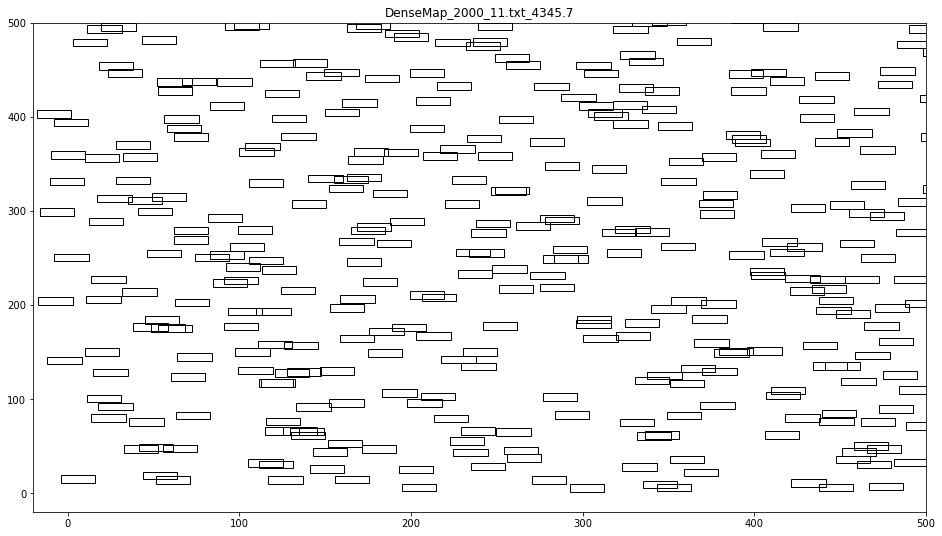

循环次数：0计算次数：64
循环次数：0tabu长度：325
循环次数：50计算次数：54
循环次数：50tabu长度：276
循环次数：100计算次数：48
循环次数：100tabu长度：242
循环次数：150计算次数：42
循环次数：150tabu长度：212
循环次数：200计算次数：36
循环次数：200tabu长度：186
循环次数：250计算次数：31
循环次数：250tabu长度：160
循环次数：300计算次数：27
循环次数：300tabu长度：137
循环次数：350计算次数：23
循环次数：350tabu长度：118
循环次数：400计算次数：19
循环次数：400tabu长度：101
循环次数：450计算次数：18
循环次数：450tabu长度：92
1456.1999999999975 300


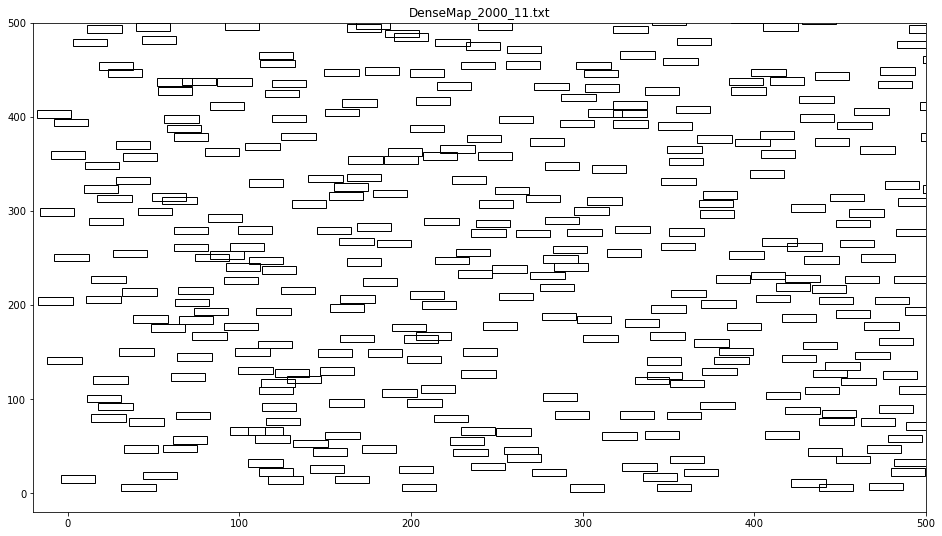

220 finished
250 started
初始状态：
4163.799999999999


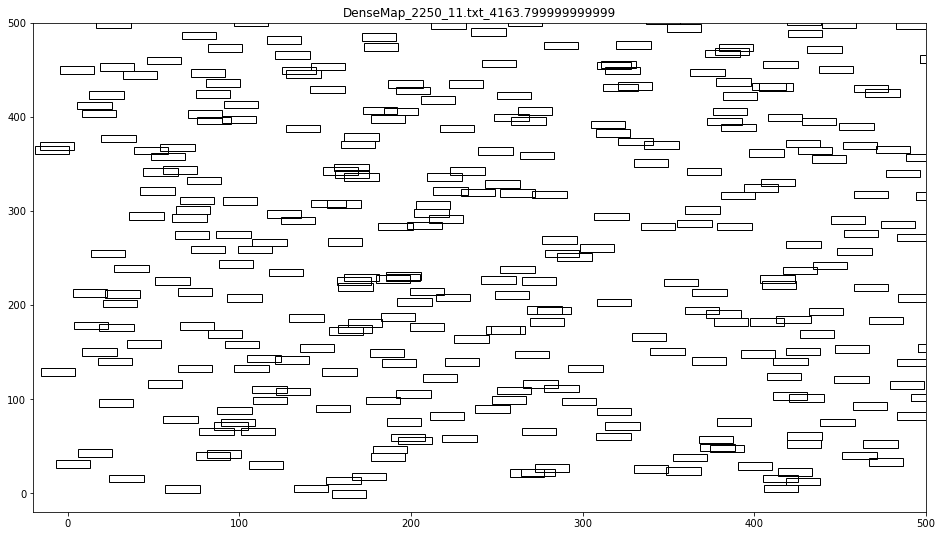

循环次数：0计算次数：61
循环次数：0tabu长度：308
循环次数：50计算次数：52
循环次数：50tabu长度：265
循环次数：100计算次数：45
循环次数：100tabu长度：231
循环次数：150计算次数：39
循环次数：150tabu长度：201
循环次数：200计算次数：34
循环次数：200tabu长度：174
循环次数：250计算次数：29
循环次数：250tabu长度：149
循环次数：300计算次数：25
循环次数：300tabu长度：127
循环次数：350计算次数：21
循环次数：350tabu长度：111
循环次数：400计算次数：18
循环次数：400tabu长度：95
循环次数：450计算次数：16
循环次数：450tabu长度：86
1443.4999999999973 286


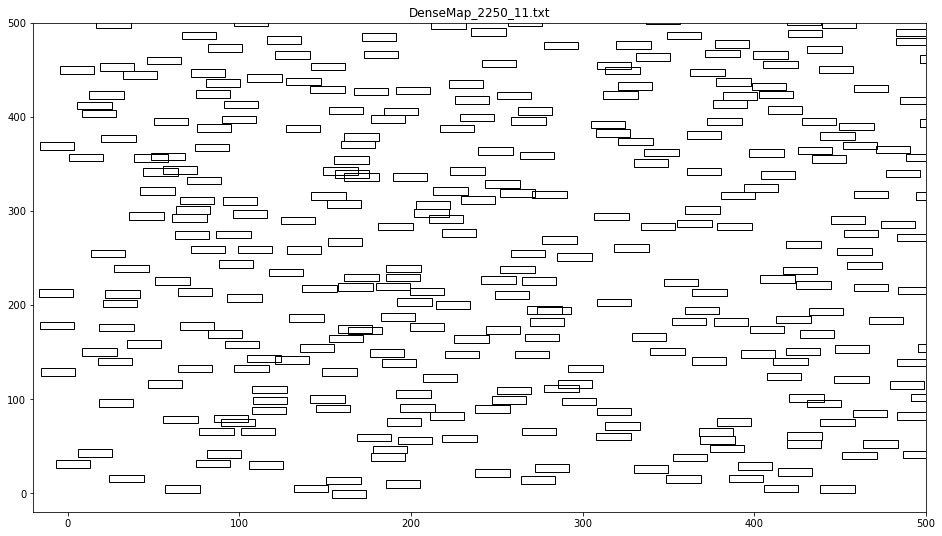

250 finished
280 started
初始状态：
5041.8


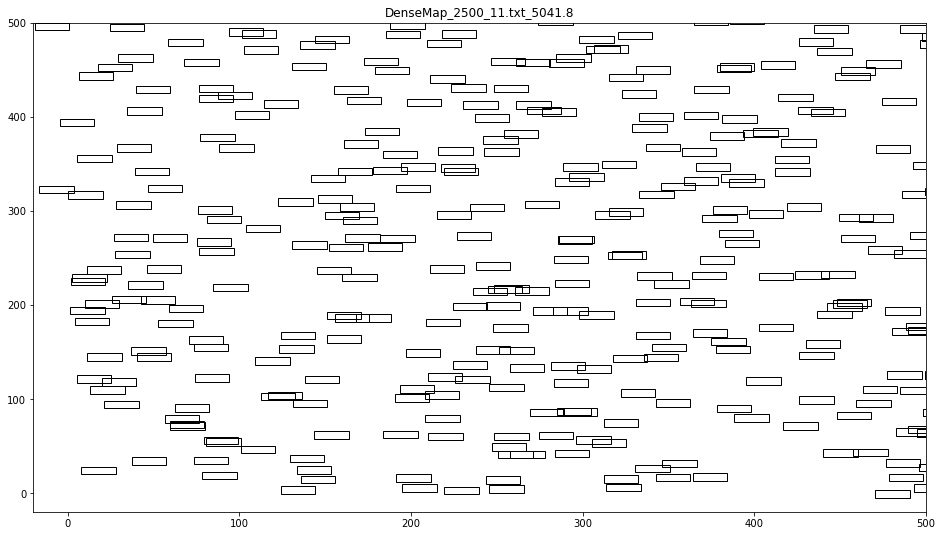

循环次数：0计算次数：74
循环次数：0tabu长度：376
循环次数：50计算次数：64
循环次数：50tabu长度：326
循环次数：100计算次数：57
循环次数：100tabu长度：290
循环次数：150计算次数：51
循环次数：150tabu长度：259
循环次数：200计算次数：45
循环次数：200tabu长度：230
循环次数：250计算次数：40
循环次数：250tabu长度：205
循环次数：300计算次数：35
循环次数：300tabu长度：179
循环次数：350计算次数：31
循环次数：350tabu长度：157
循环次数：400计算次数：26
循环次数：400tabu长度：135
循环次数：450计算次数：23
循环次数：450tabu长度：118
1812.8999999999985 392


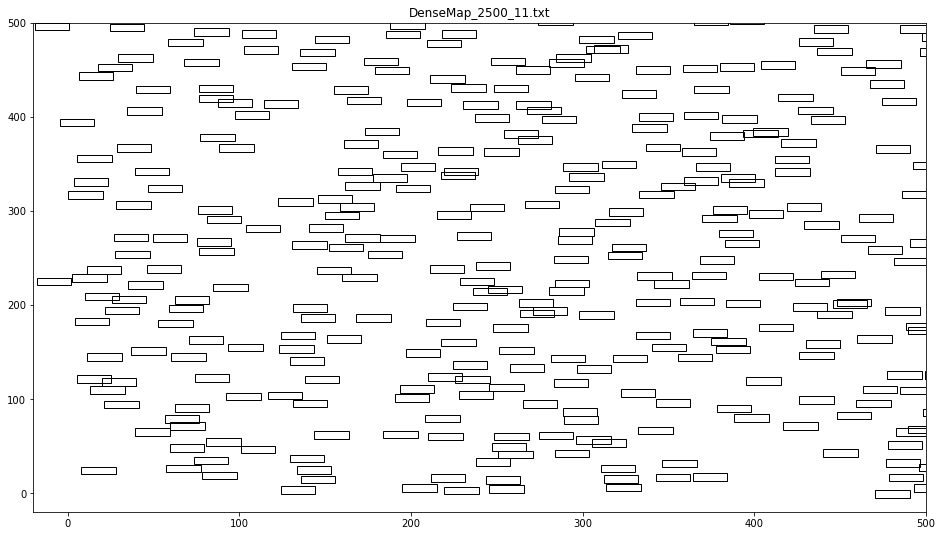

280 finished
310 started
初始状态：
5373.0


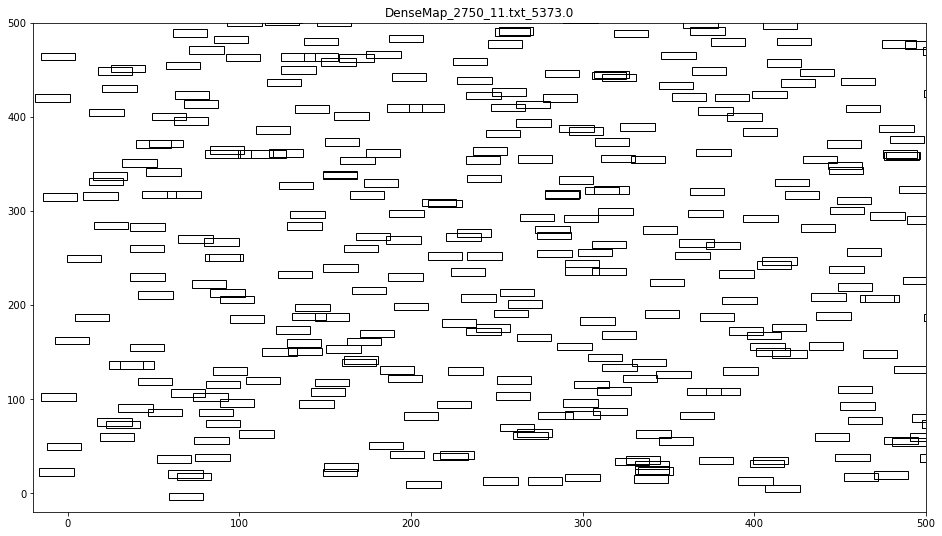

循环次数：0计算次数：79
循环次数：0tabu长度：398
循环次数：50计算次数：70
循环次数：50tabu长度：352
循环次数：100计算次数：62
循环次数：100tabu长度：315
循环次数：150计算次数：56
循环次数：150tabu长度：283
循环次数：200计算次数：50
循环次数：200tabu长度：254
循环次数：250计算次数：44
循环次数：250tabu长度：226
循环次数：300计算次数：40
循环次数：300tabu长度：202
循环次数：350计算次数：34
循环次数：350tabu长度：176
循环次数：400计算次数：30
循环次数：400tabu长度：153
循环次数：450计算次数：25
循环次数：450tabu长度：130
1964.6999999999966 424


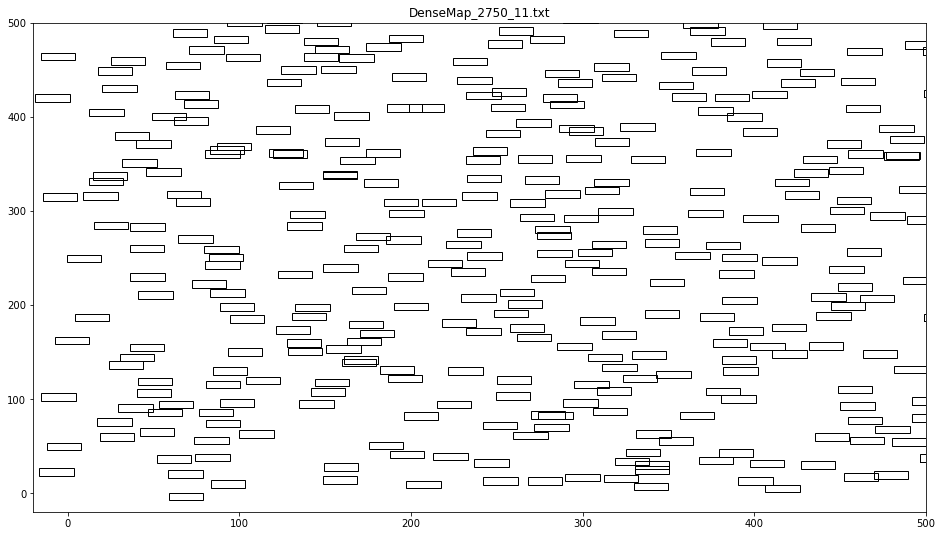

310 finished
340 started
初始状态：
5686.3


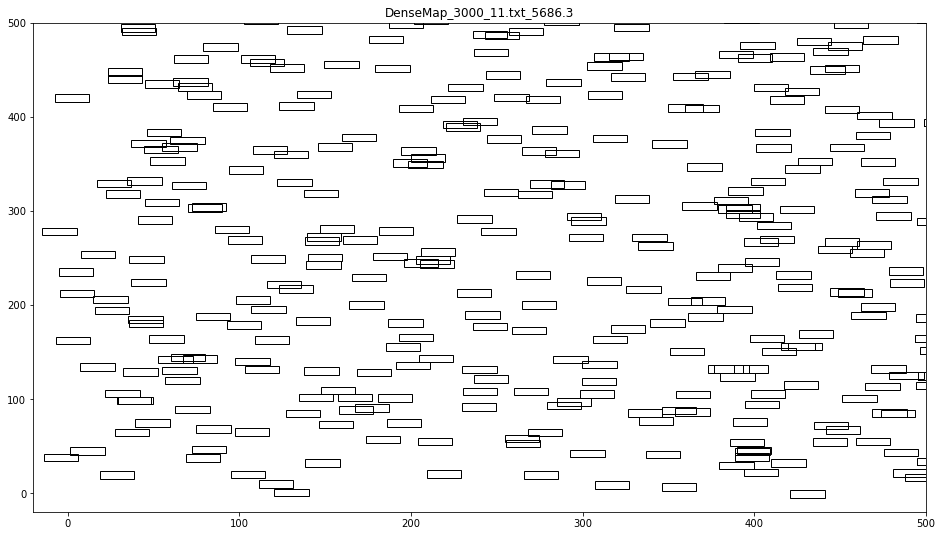

循环次数：0计算次数：83
循环次数：0tabu长度：420
循环次数：50计算次数：74
循环次数：50tabu长度：373
循环次数：100计算次数：66
循环次数：100tabu长度：336
循环次数：150计算次数：60
循环次数：150tabu长度：304
循环次数：200计算次数：54
循环次数：200tabu长度：276
循环次数：250计算次数：49
循环次数：250tabu长度：248
循环次数：300计算次数：44
循环次数：300tabu长度：222
循环次数：350计算次数：39
循环次数：350tabu长度：198
循环次数：400计算次数：34
循环次数：400tabu长度：174
循环次数：450计算次数：30
循环次数：450tabu长度：155
2300.799999999996 520


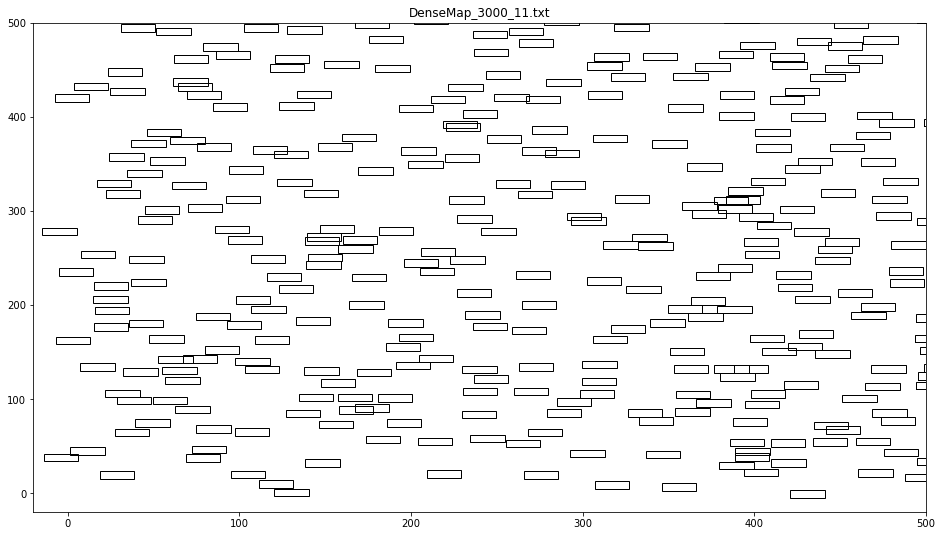

340 finished


In [24]:
li = [220,250,280,310,340]
for i in li:
    filename = os.path.join(sourcefolder, filelist[i])
    selectlist = range(1,10000)
    prepare_data(selectlist, filename)
    print("{} started".format(i))
    # a: layout d:cost
    a,b,c,cost_init,confilct_init = tabusearch(iteration_times=500,cacu_time=10,tabu_length=10,origin_times=1,costf=costroad,printf=print,costflite=costrod_lite,namefortest=filelist[i])
    cost_final = costroad(a)
    confilct_final = costconfilct(a)
    cost_result = []
    cost_result.append(cost_init)
    cost_result.append(cost_final)
    cost_result.append(confilct_init)
    cost_result.append(confilct_final)
    print(cost_final, confilct_final)
    plot(layout=a,name=filelist[i])
    savefilename = os.path.join(savefolder, filelist[i])
    save(a, cost_result, savefilename)
    print("{} finished".format(i))